In [ ]:
!unzip '/content/drive/MyDrive/machineHack/uhack_sentiments_20_decode_code_words/Participants_Data_DCW.zip'

Archive:  /content/drive/MyDrive/machineHack/uhack_sentiments_20_decode_code_words/Participants_Data_DCW.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
  inflating: submission.csv          
  inflating: __MACOSX/._submission.csv  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train=pd.read_csv('/content/train.csv')
train.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
test=pd.read_csv('/content/test.csv')
test.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,Made of very thin cheap metal broke on very fi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"As good as the brand names, no jams or misfire...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"unit was easy to use, with understandable in s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,I am the new family plumber. Works well. No pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Seems to be holding up well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sub=pd.read_csv('/content/submission.csv')
sub.head()

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
st=train.columns

In [ ]:
st

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [ ]:
label=['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']

 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             6136 non-null   int64 
 1   Review                         6136 non-null   object
 2   Components                     6136 non-null   int64 
 3   Delivery and Customer Support  6136 non-null   int64 
 4   Design and Aesthetics          6136 non-null   int64 
 5   Dimensions                     6136 non-null   int64 
 6   Features                       6136 non-null   int64 
 7   Functionality                  6136 non-null   int64 
 8   Installation                   6136 non-null   int64 
 9   Material                       6136 non-null   int64 
 10  Price                          6136 non-null   int64 
 11  Quality                        6136 non-null   int64 
 12  Usability                      6136 non-null   int64 
 13  Pol

In [ ]:
train.sum()

Id                                                                        18822180
Review                           For some reason everybody complains and I'm co...
Components                                                                     274
Delivery and Customer Support                                                  179
Design and Aesthetics                                                          650
Dimensions                                                                     695
Features                                                                       313
Functionality                                                                 2538
Installation                                                                   762
Material                                                                       155
Price                                                                          854
Quality                                                                       2177
Usab

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


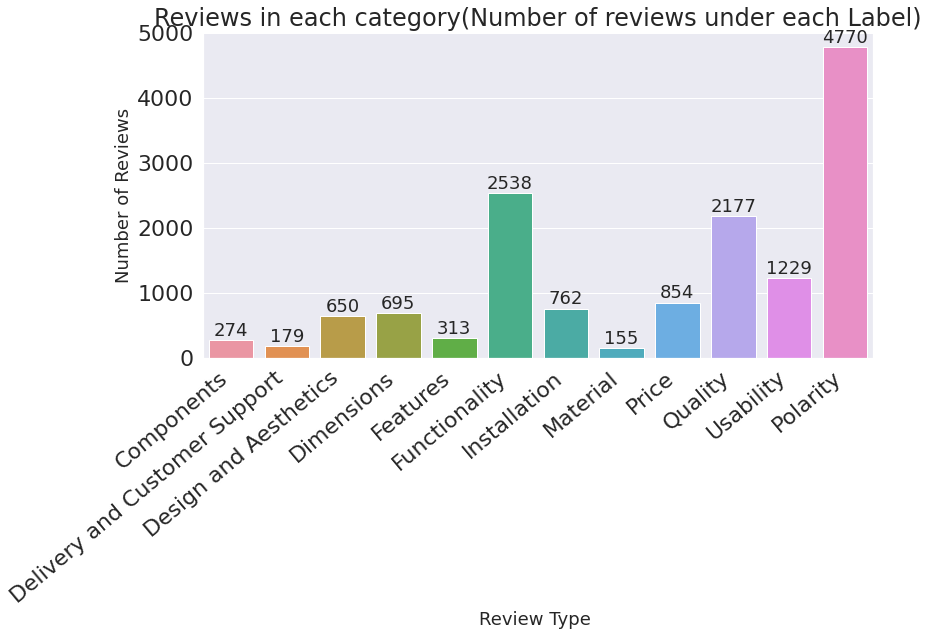

In [ ]:
categories = list(train[label].columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(12,6))
ax= sns.barplot(categories, train[label].sum().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Reviews in each category(Number of reviews under each Label)", fontsize=24)
plt.ylabel('Number of Reviews', fontsize=18)
plt.xlabel('Review Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labelv = train[labels].sum().values
for rect, l in zip(rects, labelv):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, l, ha='center', va='bottom', fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


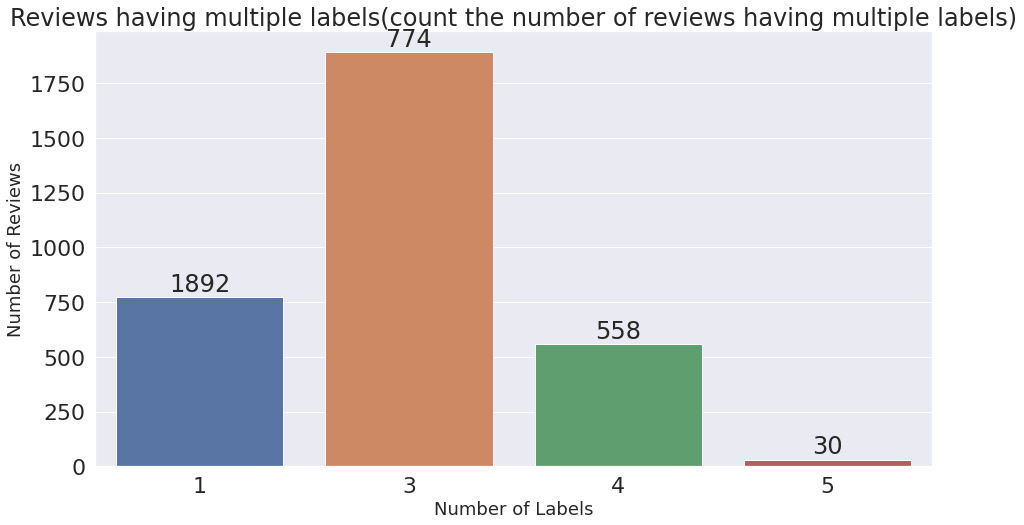

In [ ]:
rowSums = train[label].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Reviews having multiple labels(count the number of reviews having multiple labels)")
plt.ylabel('Number of Reviews', fontsize=18)
plt.xlabel('Number of Labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, l in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, l, ha='center', va='bottom')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


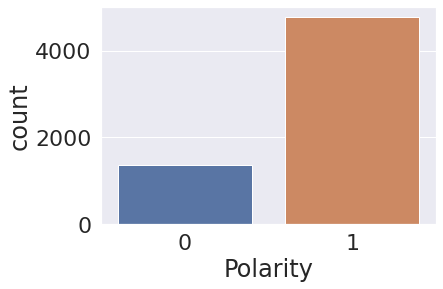

In [ ]:
sns.countplot("Polarity",data = train)

In [ ]:
train['Polarity'].value_counts()

1    4770
0    1366
Name: Polarity, dtype: int64

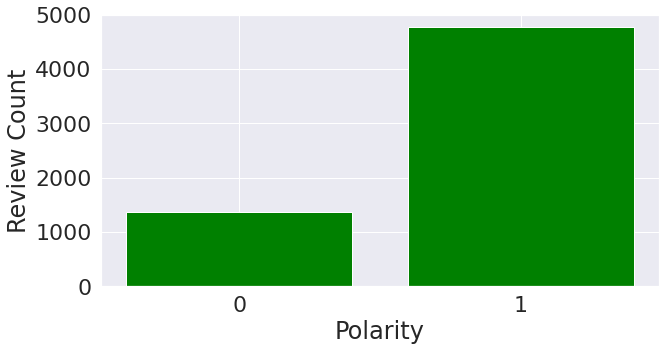

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(['0','1'], [1366,4770], color='green')
plt.xlabel('Polarity')
plt.ylabel('Review Count')
plt.show()